# Q3. Bank Churn Classification Problem
## Dataset Description:
Banking is one of those traditional industries that has gone through a steady transformation over the past few decades. Yet, many banks today with a sizeable customer base are hoping to gain a competitive edge but have not tapped into the vast amounts of data they have, especially in solving one of the most acknowledged problems – customer churn (i.e., a customer leaving the bank). It is advantageous to banks to know what leads a client to leave the bank. Banks often use the customer churn rate as one of their key business metrics because the cost of retaining existing customers is far less than acquiring new ones, and meanwhile increasing customer retention can greatly increase profits.  
Churn prevention allows companies to develop different programs such as loyalty and retention programs to keep as many customers as possible. Following are the attributes of the dataset we will be working with. 
 

- RowNumber (continuous) — corresponds to the record (row) number and has no effect on the output. 
 

- CustomerId  (categorical)— contains random values and has no effect on customer leaving the bank. 
 

- Surname  (categorical)— the surname of a customer has no impact on their decision to leave the bank 
 

- CreditScore  (continuous) — can influence customer churn, since a customer with a higher credit score is less likely to leave the bank. 
 

- Geography (categorical) — a customer’s location can affect their decision to leave the bank. 
 

- Gender (categorical) — it’s interesting to explore whether gender plays a role in a customer leaving the bank. 
 

- Age (continuous) — this is certainly relevant, since older customers are less likely to leave their bank than younger ones. 
 

- Tenure (continuous) — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank. 
 

- Balance (continuous) — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances. 
 

- NumOfProducts (continuous) — refers to the number of products that a customer has purchased through the bank. 
 

- HasCrCard (categorical) — denotes whether a customer has a credit card. This column is also relevant since people with a credit card are less likely to leave the bank. 
 

- IsActiveMember (categorical) — active customers are less likely to leave the bank. 
 

- EstimatedSalary (continuous) — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries. 
 

- Exited (Categorical) — whether or not the customer left the bank. (Target variable) 

# Import all the necessary libraries

In [86]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Scaling & splitting Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Sampling library
from imblearn.over_sampling import SMOTE

#Evaluation Libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### b.	Data Loading / Preprocessing
#### i.	Loading
1. Load the data <BankChurn.csv> as a pandas dataframe using the `pd.read_csv()` function which returns a dataframe , store this value in a variable named ‘df’.

In [30]:
df = pd.read_csv("D:\Stevens GIT\Stevens_IT-MS_in_CS\FALL_24\CS556_Mathematical_ML\HW\hw3\Q3\churn.csv")

print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

2. The resulting dataframe should have the shape (10000,14) indicating that there are 10000 instances and 14 columns. 

In [31]:
df.shape

(10000, 14)

3. In this dataframe, currently you have 9 features which are the following: RowNumber, CustomerID, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary. Using the ‘pandas.dataframe.drop’ function to drop the RowNumber, CustomerID and Surname columns.

In [32]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
print(df.head())

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  


4. Using the ‘pandas.isnull()’ function check if there are any missing values in the dataframe and report this value (i.e., the number of missing values per column of the dataframe).

In [33]:
missing_values = df.isnull().sum()
missing_values

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

5. Your task is to use feature columns to predict the target column (which is categorical in our case). This can be cast as a classification problem. 

6. Create a dataframe X of features (by dropping the ‘Exited’ column from the original dataframe). Create a Pandas Series object of targets Y (by only considering the ‘Exited’ column from the original dataframe). Moving forward, we will be working with X and Y.

In [34]:
X = df.drop('Exited', axis=1)
Y = df['Exited'] 
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

### ii. Data Visualisation
1. Visualize the distribution of the ‘Age’ and ‘CreditScore’ column using the ‘matplotlib.pyplot.hist’ function as two separate plots. Label the x-axis and the y-axis along with giving the plot a title and assign a bin size of 7.

- What are the respective mean values of these two features (use the pandas.DataFrame.mean() function)?
- What is the respective standard deviation of these two features (use the pandas.DataFrame.std() function)? 

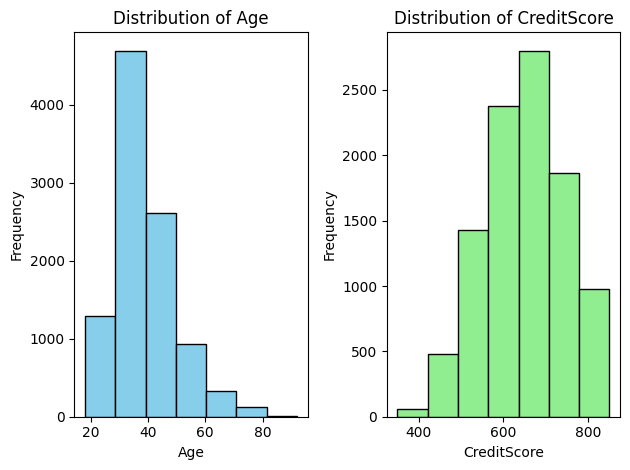

Statistics for 'Age':
Mean: 38.92
Standard Deviation: 10.49

Statistics for 'CreditScore':
Mean: 650.53
Standard Deviation: 96.65


In [35]:
# Age Histogram
plt.subplot(1, 2, 1)
plt.hist(X['Age'], bins=7, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# CreditScore Histogram
plt.subplot(1, 2, 2)
plt.hist(X['CreditScore'], bins=7, color='lightgreen', edgecolor='black')
plt.title('Distribution of CreditScore')
plt.xlabel('CreditScore')
plt.ylabel('Frequency')

# Show the histograms
plt.tight_layout()
plt.show()

# Calculate mean and standard deviation
age_mean = X['Age'].mean()
age_std = X['Age'].std()
creditscore_mean = X['CreditScore'].mean()
creditscore_std = X['CreditScore'].std()

# Print the results
print("Statistics for 'Age':")
print(f"Mean: {age_mean:.2f}")
print(f"Standard Deviation: {age_std:.2f}\n")

print("Statistics for 'CreditScore':")
print(f"Mean: {creditscore_mean:.2f}")
print(f"Standard Deviation: {creditscore_std:.2f}")

2. Only for this question use the dataframe consisting of the target variable (initialized as ‘df’). Using matplotlib visualize the number of males and females in each country who are active members and not active members. (Visualize this using a barchart. You will need to use the ‘Gender’, ‘Geography’ and ‘IsActiveMember’ features for this question). Visualize these graphs on two separate plots with respect to their active status. To create a barchart using matplotlib use the ‘matplotlib.pyplot.bar()’ function. Also label the x-axis, y-axis and give the plots a title. 

- How many males are from France and are active members?
- How many females are from Spain and are active members?
- How many males are from France or Germany who are not active members?

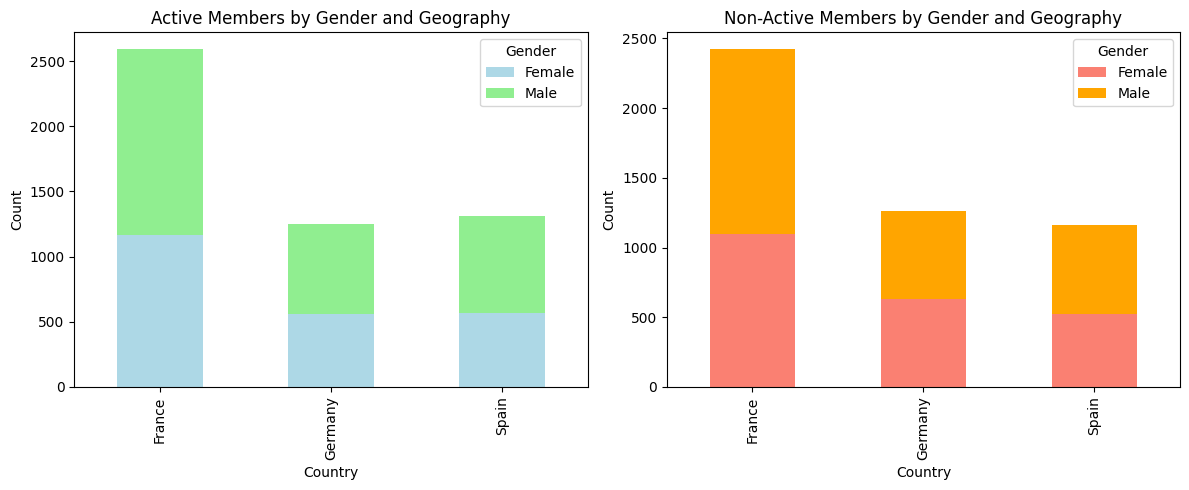

1. Males from France who are active members: 1429
2. Females from Spain who are active members: 563
3. Males from France or Germany who are not active members: 1951


In [36]:
# Filter the data
active_members = df[df['IsActiveMember'] == 1]
non_active_members = df[df['IsActiveMember'] == 0]

# Grouping data by Gender and Geography
active_grouped = active_members.groupby(['Geography', 'Gender']).size().unstack()
non_active_grouped = non_active_members.groupby(['Geography', 'Gender']).size().unstack()

# Plot Active Members
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
active_grouped.plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen'], ax=plt.gca())
plt.title("Active Members by Gender and Geography")
plt.xlabel("Country")
plt.ylabel("Count")
plt.legend(title="Gender")

# Plot Non-Active Members
plt.subplot(1, 2, 2)
non_active_grouped.plot(kind='bar', stacked=True, color=['salmon', 'orange'], ax=plt.gca())
plt.title("Non-Active Members by Gender and Geography")
plt.xlabel("Country")
plt.ylabel("Count")
plt.legend(title="Gender")

plt.tight_layout()
plt.show()

# Answering Specific Questions
# 1. Males from France who are active members
males_france_active = df[(df['Geography'] == 'France') & (df['Gender'] == 'Male') & (df['IsActiveMember'] == 1)].shape[0]

# 2. Females from Spain who are active members
females_spain_active = df[(df['Geography'] == 'Spain') & (df['Gender'] == 'Female') & (df['IsActiveMember'] == 1)].shape[0]

# 3. Males from France or Germany who are not active members
males_france_germany_nonactive = df[(df['Geography'].isin(['France', 'Germany'])) & (df['Gender'] == 'Male') & (df['IsActiveMember'] == 0)].shape[0]

# Print results
print(f"1. Males from France who are active members: {males_france_active}")
print(f"2. Females from Spain who are active members: {females_spain_active}")
print(f"3. Males from France or Germany who are not active members: {males_france_germany_nonactive}")


3. Using the target variable in Y plot a bar chart showing the distribution of the ‘Exited’ column (To create a barchart using matplotlib use the ‘matplotlib.pyplot.bar()’ function). 

- What can be said about this distribution (specifically keeping in mind this distribution represents the target variable) will this have an impact on the results of the classification model? 

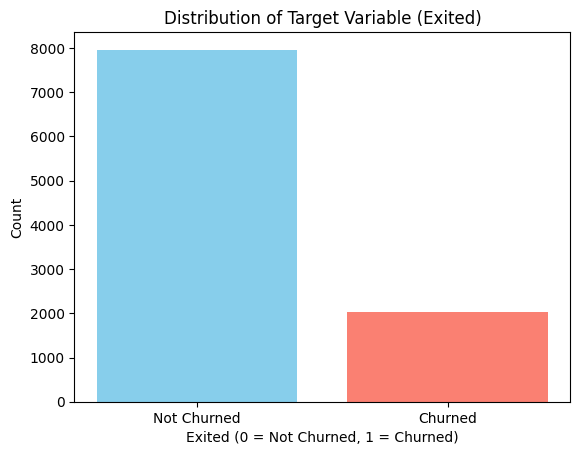

Distribution of 'Exited' (Target Variable):
Exited
0    7963
1    2037
Name: count, dtype: int64


In [37]:
# Plotting the distribution of the 'Exited' column (target variable)
exit_counts = Y.value_counts()  # Get the count of 0's and 1's

# Plotting the bar chart
plt.bar(exit_counts.index, exit_counts.values, color=['skyblue', 'salmon'])
plt.title('Distribution of Target Variable (Exited)')
plt.xlabel('Exited (0 = Not Churned, 1 = Churned)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()

# Displaying the counts for reference
print("Distribution of 'Exited' (Target Variable):")
print(exit_counts)


4. So far you should have successfully been able to load, preprocess and visualize your data. Now, use the ‘pd.get_dummies()’ function to convert categorical data into dummy variables (‘Gender’ and ‘Geography’).
**(Perform this only on X)**. 

- What is the shape of X?

In [38]:
X_dummies = pd.get_dummies(X, columns=['Gender', 'Geography'], drop_first=True)


print(f"Shape of X after converting categorical columns to dummy variables: {X_dummies.shape}")

Shape of X after converting categorical columns to dummy variables: (10000, 11)


### iii. Data Splitting
1. Split data into training and test sets using the sklearn ‘train_test_split() function in a **80:20** ratio. The result of your data split should be X_train, X_test, y_train, y_test. (Respectively your training features, testing features, training targets and testing target arrays).

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (8000, 11)
Shape of X_test: (2000, 11)
Shape of y_train: (8000,)
Shape of y_test: (2000,)


### iv. Data Scaling
1. Employ the ‘MinMaxScaler’  function on the continuous attributes in X_train. Employ the ‘fit_transform()’ function of the scaler to retrieve the new (scaled) version of the training data (i.e., fit_transform() should be run on `X_train`). Store the result in X_train again. 


In [40]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Display the scaled X_train
print("Scaled X_train:")
print(X_train.head())

Scaled X_train:
   CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0        0.672  0.189189     0.6  0.000000       0.333333        1.0   
1        0.564  0.324324     0.4  0.476786       0.333333        1.0   
2        0.418  0.081081     0.3  0.457317       0.000000        1.0   
3        0.422  0.121622     0.9  0.540606       0.000000        1.0   
4        0.334  0.513514     0.9  0.566554       0.000000        0.0   

   IsActiveMember  EstimatedSalary  Gender_Male  Geography_Germany  \
0             1.0         0.895550          1.0                0.0   
1             1.0         0.980029          1.0                1.0   
2             0.0         0.429261          1.0                0.0   
3             0.0         0.765408          0.0                0.0   
4             0.0         0.197107          1.0                0.0   

   Geography_Spain  
0              0.0  
1              0.0  
2              1.0  
3              0.0  
4              0.0  


2. Scale the X_test data using the scaler you have just fit, this time using the `transform()` function. Note: store the scaled values back into X_test.  At the end of this step, you must have X_train, X_test, scaled according to the MinMaxScaler.

In [41]:
X_test_scaled = scaler.transform(X_test)

X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display the scaled X_test
print("Scaled X_test:")
print(X_test.head())


Scaled X_test:
   CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0        0.492  0.189189     0.3  0.385452       0.333333        0.0   
1        0.546  0.337838     0.1  0.000000       0.333333        1.0   
2        0.502  0.351351     0.4  0.000000       0.333333        1.0   
3        0.312  0.554054     0.8  0.474902       0.333333        1.0   
4        0.420  0.121622     0.7  0.498194       0.000000        1.0   

   IsActiveMember  EstimatedSalary  Gender_Male  Geography_Germany  \
0             0.0         0.208616          1.0                1.0   
1             1.0         0.731883          1.0                0.0   
2             0.0         0.292531          0.0                0.0   
3             1.0         0.853458          1.0                1.0   
4             1.0         0.573241          0.0                0.0   

   Geography_Spain  
0              0.0  
1              0.0  
2              1.0  
3              0.0  
4              1.0  


### c. Modelling
### i. Modeling (Model Instantiation / Training) using Logistic Regression classifier 
1. Employ the Logistic Regression classifier from sklearn and instantiate the model. Label this model as ‘model_1_lr’

In [44]:
model_1_lr = LogisticRegression()
model_1_lr

LogisticRegression()

2. Once instantiated, `fit()` the model using the scaled X_train, y_train data.

In [45]:
model_1_lr.fit(X_train, y_train)

LogisticRegression()

3. Employ the `predict()` function to obtain predictions on X_test and store this in a variable labeled as ‘y_pred_lr’.

In [48]:
y_pred_lr = model_1_lr.predict(X_test)
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

4. Employ the ‘accuracy_score()’ function by using the ‘y_pred_lr’ and ‘y_test’ variables as the functions parameters and print the accuracy of the Logistic Regression model   

In [50]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_lr

0.8125

### ii. Modeling (Model Instantiation / Training) using Support Vector Machine Classifier 

1. Employ the Support Vector Machine (SVM) classifier from sklearn and instantiate the model. Label this model as ‘model_2_svm’

In [51]:
model_2_svm = SVC()
model_2_svm

SVC()

2. Once instantiated, ‘fit()’ the model using the scaled X_train, y_train data.

In [52]:
model_2_svm.fit(X_train, y_train)

SVC()

3. Employ the ‘predict()’ function to obtain predictions on X_test and store this in a variable labeled as ‘y_pred_svm’. 

In [53]:
y_pred_svm = model_2_svm.predict(X_test)

4. Employ the ‘accuracy_score’ function (‘sklearn.metrics.accuracy()’ function) by using the ‘y_pred_lr’ and ‘y_test’ variables as the functions parameters and print the accuracy of the SVM model. 

In [56]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy of the Support Vector Machine model: {accuracy_svm:.4f}")

Accuracy of the Support Vector Machine model: 0.8510


### iii. Modeling Logistic Regression Classifier on a balanced dataset 
1. Employ Synthetic Minority Oversampling on X_train and y_train. To use SMOTE you will have to install the imbalanced-learn library, this can either be down by executing the following command ‘pip install -U imbalanced-learn’ command ‘conda install -c conda-forage imbalanced-learn’ command for the Anaconda Cloud platform. (For more information click the following link: https://imbalanced-learn.org/stable/install.html).  
Import the ‘SMOTE’ function from the ‘imblearn.over_sampling’. Use the ‘smote.refit_resample()’ function on X_train and y_train using its default parameters. Store them in X_train_smote, y_train_smote. - Be careful to employ SMOTE ONLY on the training data and not on the full dataset because that can cause inadvertent “data leakage” (please see: https://arxiv.org/pdf/2107.00079.pdf for details) . 

In [57]:
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

2. Employ a new Logistic Regression classifier from sklearn and instantiate the model. Label this model as ‘model_3_smote_lr’

In [59]:
model_3_smote_lr = LogisticRegression()
model_3_smote_lr

LogisticRegression()

3. Once instantiated, ‘fit()’ the model using the balanced X_train_smote, y_train_smote data.

In [60]:
model_3_smote_lr.fit(X_train_smote, y_train_smote)

LogisticRegression()

4. Employ the ‘predict()’ function to obtain predictions on X_test and store this in a variable labeled as ‘y_pred_smote_lr’. 

In [61]:
y_pred_smote_lr = model_3_smote_lr.predict(X_test)

5. Employ the ‘accuracy_score’ function by using the ‘y_pred_lr’ and ‘y_test’ variables as the functions parameters and print the accuracy of the new Logistic Regression model.

- What is your initial observation of the accuracy of model_3_smote_lr vs. accuracy of model_1_lr? What could be the reasoning for (any possible) change in accuracy?

In [65]:
accuracy_smote_lr = accuracy_score(y_test, y_pred_smote_lr)

# Print the accuracy
print(f"Accuracy of the Logistic Regression model on SMOTE data: {accuracy_smote_lr:.4f}\n")

print("At first glance, model_1_lr (trained on the imbalanced dataset) outperforms model_3_smote_lr (trained on the SMOTE-balanced dataset) in terms of accuracy.\n This suggests that balancing the dataset with SMOTE may have reduced the model’s overall performance on the test set.")

Accuracy of the Logistic Regression model on SMOTE data: 0.7225

At first glance, model_1_lr (trained on the imbalanced dataset) outperforms model_3_smote_lr (trained on the SMOTE-balanced dataset) in terms of accuracy.
 This suggests that balancing the dataset with SMOTE may have reduced the model’s overall performance on the test set.


### iv. Modeling SVM on a balanced dataset
1. Employ Synthetic Minority Oversampling on X_train and y_train. Import the ‘SMOTE’ function from the ‘imblearn.over_sampling’. Use the ‘smote.refit_resample()’ function on X_train and y_train. Store them in X_train_smote, y_train_smote. 

- At the end of this step, your new training set i.e., (X_train_smote , y_train_smote) should have the same number of instances for each of the two classes.

In [ ]:
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Display the new shapes of the resampled data
print(f"Shape of X_train_smote: {X_train_smote.shape}")
print(f"Shape of y_train_smote: {y_train_smote.shape}")

# Check the class distribution in the new resampled data
print("Class distribution in the resampled training data:")
print(y_train_smote.value_counts())

Shape of X_train_smote: (12712, 11)
Shape of y_train_smote: (12712,)
Class distribution in the resampled training data:
Exited
0    6356
1    6356
Name: count, dtype: int64


2. Employ a new SVM classifier from sklearn and instantiate the model. Label this model as ‘model_4_smote_svm’

In [68]:
model_4_smote_svm = SVC(random_state=42)
model_4_smote_svm

SVC(random_state=42)

3. Once instantiated, ‘fit()’ the model using the balanced X_train_smote, y_train_smote data.

In [69]:
model_4_smote_svm.fit(X_train_smote, y_train_smote)

SVC(random_state=42)

4. Employ the ‘predict()’ function to obtain predictions on X_test and store this in a variable labeled as ‘y_pred_smote_svm’.  

In [70]:
y_pred_smote_svm = model_4_smote_svm.predict(X_test)

5. Employ the ‘accuracy_score’ function (‘sklearn.metrics.accuracy()’ function) by using the ‘y_pred_lr’ and ‘y_test’ variables as the functions parameters and print the accuracy of the new SVM model. 

- What is your initial observation of the accuracy of model_4_smote_svm vs. accuracy of model_2_svm? What could be the reasoning for (any possible) change in accuracy? 

In [72]:
accuracy_smote_svm = accuracy_score(y_test, y_pred_smote_svm)
print(f"Accuracy of the SVM model on SMOTE-balanced data: {accuracy_smote_svm:.4f}")

print("Drop in Accuracy after Applying SMOTE (0.8510 → 0.7775)\nThe drop in accuracy after applying SMOTE could be due to overfitting")

Accuracy of the SVM model on SMOTE-balanced data: 0.7775
Drop in Accuracy after Applying SMOTE (0.8510 → 0.7775)
The drop in accuracy after applying SMOTE could be due to overfitting


### Modeling Grid Search Parameter Selection for SVM 
1. We will now be reverting to our X_train and y_train data. Initialize a variable labeled as ‘param_grid’ storing the following: {"gamma": [0.001, 0.01, 0.1], "C": [1,10,100,1000,10000]}.

In [75]:
param_grid = {
    "gamma": [0.001, 0.01, 0.1],
    "C": [1, 10, 100, 1000, 10000]
}
param_grid

{'gamma': [0.001, 0.01, 0.1], 'C': [1, 10, 100, 1000, 10000]}

2. Employ the gridsearchCV function and initialize the following parameters: estimator = SVC(), param_grid = param_grid, cv=5, verbose =1, scoring = ‘accuracy’

In [76]:
grid_search = GridSearchCV(
    estimator=SVC(),               
    param_grid=param_grid,        
    cv=5,                          
    verbose=1,                    
    scoring='accuracy'            
)

3.  Once instantiated, ‘fit()’ the model using the X_train_smote, y_train_smote data.

In [77]:
grid_search.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'gamma': [0.001, 0.01, 0.1]},
             scoring='accuracy', verbose=1)

4. Print the best paramaters using the **‘best_params_’** attribute and print the mean cross validated score of the best estimator (hint use the ‘best_score_’ attribute).

In [78]:
print("Best parameters found by GridSearchCV on SMOTE data:")
print(grid_search.best_params_)

print("Best cross-validation accuracy on SMOTE data:", grid_search.best_score_)

Best parameters found by GridSearchCV on SMOTE data:
{'C': 10000, 'gamma': 0.1}
Best cross-validation accuracy on SMOTE data: 0.8197779313046134


5. Employ the ‘score’ function by using the ‘X_test’ and ‘y_test’ variables as the functions parameters and print the accuracy of the new gridsearch SVM model.SVM model.

In [81]:
test_accuracy = grid_search.best_estimator_.score(X_test, y_test)
print("Accuracy of the GridSearch SVM model on test data:", test_accuracy)

Accuracy of the GridSearch SVM model on test data: 0.77


### d. Evaluation
1. (2 points) Calculate F1 Score, Precision, Recall, Accuracy (All on the test set X_test, y_test) .

- Employ the `classification_report()` function from sklearn.metrics to report the precision recall, f1 score and accuracy for each class for the first **four models (parts c.i – c.iv).**

In [82]:
# Evaluate Logistic Regression model on original data (model_1_lr)
print("Classification Report for Logistic Regression (Original Data):")
y_pred_lr = model_1_lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

# Evaluate SVM model on original data (model_2_svm)
print("Classification Report for SVM (Original Data):")
y_pred_svm = model_2_svm.predict(X_test)
print(classification_report(y_test, y_pred_svm))

# Evaluate Logistic Regression model on SMOTE data (model_3_smote_lr)
print("Classification Report for Logistic Regression (SMOTE Data):")
y_pred_smote_lr = model_3_smote_lr.predict(X_test)
print(classification_report(y_test, y_pred_smote_lr))

# Evaluate SVM model on SMOTE data (model_4_smote_svm)
print("Classification Report for SVM (SMOTE Data):")
y_pred_smote_svm = model_4_smote_svm.predict(X_test)
print(classification_report(y_test, y_pred_smote_svm))


Classification Report for Logistic Regression (Original Data):
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.57      0.19      0.29       393

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Classification Report for SVM (Original Data):
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1607
           1       0.85      0.30      0.44       393

    accuracy                           0.85      2000
   macro avg       0.85      0.64      0.68      2000
weighted avg       0.85      0.85      0.82      2000

Classification Report for Logistic Regression (SMOTE Data):
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1607
           1       0.39      0.71      0.50       393

    accuracy

2. Visualize a confusion matrix for the first four models 

- Employ the `confusion_matrix()` function from sklearn.metrics to report the confusion matrix results.
- Report the False Negative and False Positive values for model_1_lr.

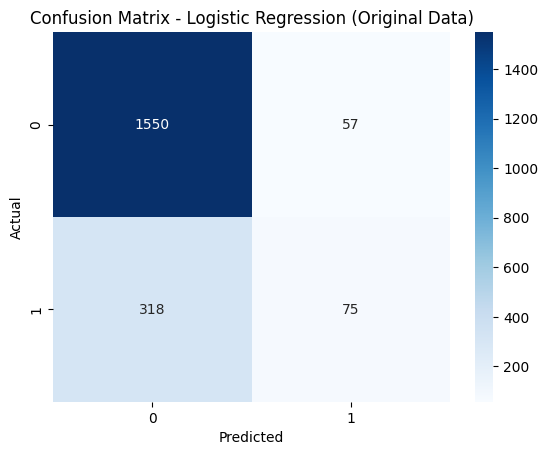

False Negative for model_1_lr: 318
False Positive for model_1_lr: 57


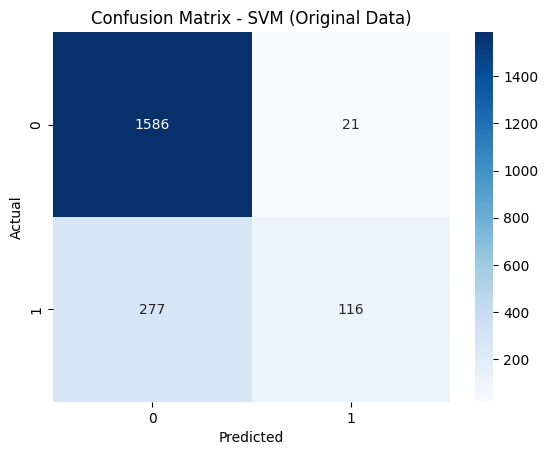

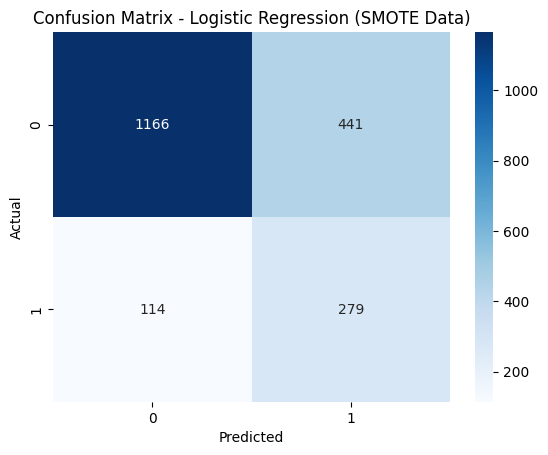

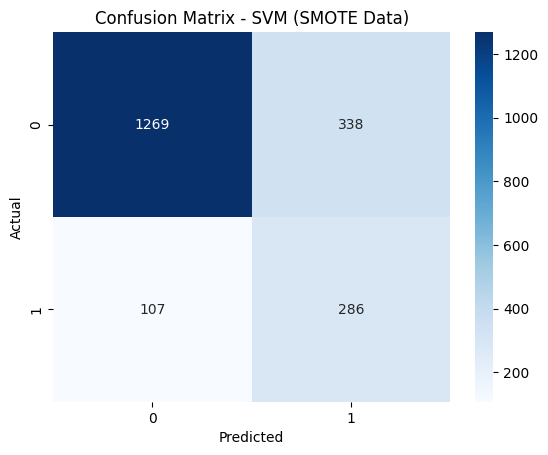

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to visualize the confusion matrix
def plot_confusion_matrix(cm, model_name):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# 1. Confusion Matrix for Logistic Regression (Original Data)
y_pred_lr = model_1_lr.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred_lr)
plot_confusion_matrix(cm_lr, "Logistic Regression (Original Data)")

# Report False Negatives (FN) and False Positives (FP) for model_1_lr
FN_lr = cm_lr[1, 0]  # False Negatives: Actual class is 1, predicted as 0
FP_lr = cm_lr[0, 1]  # False Positives: Actual class is 0, predicted as 1
print(f"False Negative for model_1_lr: {FN_lr}")
print(f"False Positive for model_1_lr: {FP_lr}")

# 2. Confusion Matrix for SVM (Original Data)
y_pred_svm = model_2_svm.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix(cm_svm, "SVM (Original Data)")

# 3. Confusion Matrix for Logistic Regression (SMOTE Data)
y_pred_smote_lr = model_3_smote_lr.predict(X_test)
cm_smote_lr = confusion_matrix(y_test, y_pred_smote_lr)
plot_confusion_matrix(cm_smote_lr, "Logistic Regression (SMOTE Data)")

# 4. Confusion Matrix for SVM (SMOTE Data)
y_pred_smote_svm = model_4_smote_svm.predict(X_test)
cm_smote_svm = confusion_matrix(y_test, y_pred_smote_svm)
plot_confusion_matrix(cm_smote_svm, "SVM (SMOTE Data)")


3. Report the best F1 score of the grid search implemented in the fifth model **(part c.v)**. Also report the best parameters from the grid search on the training set. 

In [92]:
best_f1_score = grid_search.best_score_

# Report the best parameters from the grid search
best_params = grid_search.best_params_

# Print the results
print(f"Best F1 Score from Grid Search: {best_f1_score}")
print(f"Best Parameters from Grid Search: {best_params}")

Best F1 Score from Grid Search: 0.8197779313046134
Best Parameters from Grid Search: {'C': 10000, 'gamma': 0.1}
